# HOUSE PRICE PREDICTION PROJECT

In [194]:
## importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
from xgboost import XGBRegressor

import sklearn.metrics as sm

In [181]:
df_train = pd.read_csv('train_1.csv',index_col = 'Id')
df_test = pd.read_csv('test_1.csv',index_col = 'Id')

df_train.shape
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [182]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [183]:
# Remove rows with missing target, separate target from predictors
df_train.dropna(axis=0, subset=['SalePrice'], inplace=True)
df_train.shape

(1460, 80)

In [184]:
#first lets get only numeric columns
df_train_num= df_train.select_dtypes(exclude='object').copy()
df_train_num.shape
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [185]:
#there all too many columns with 0 value, this 0 value represnt this value doent exist
#so to make it simple lets replace all 0 value with NAN and drop all cloumn with NaN values
df_train_num = df_train_num.replace(to_replace =0, value =np.nan).dropna(axis=1)
df_train_num.head()


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,856,1710,8,2,2008,208500
2,20,9600,6,8,1976,1976,1262,1262,6,5,2007,181500
3,60,11250,7,5,2001,2002,920,1786,6,9,2008,223500
4,70,9550,7,5,1915,1970,961,1717,7,2,2006,140000
5,60,14260,8,5,2000,2000,1145,2198,9,12,2008,250000


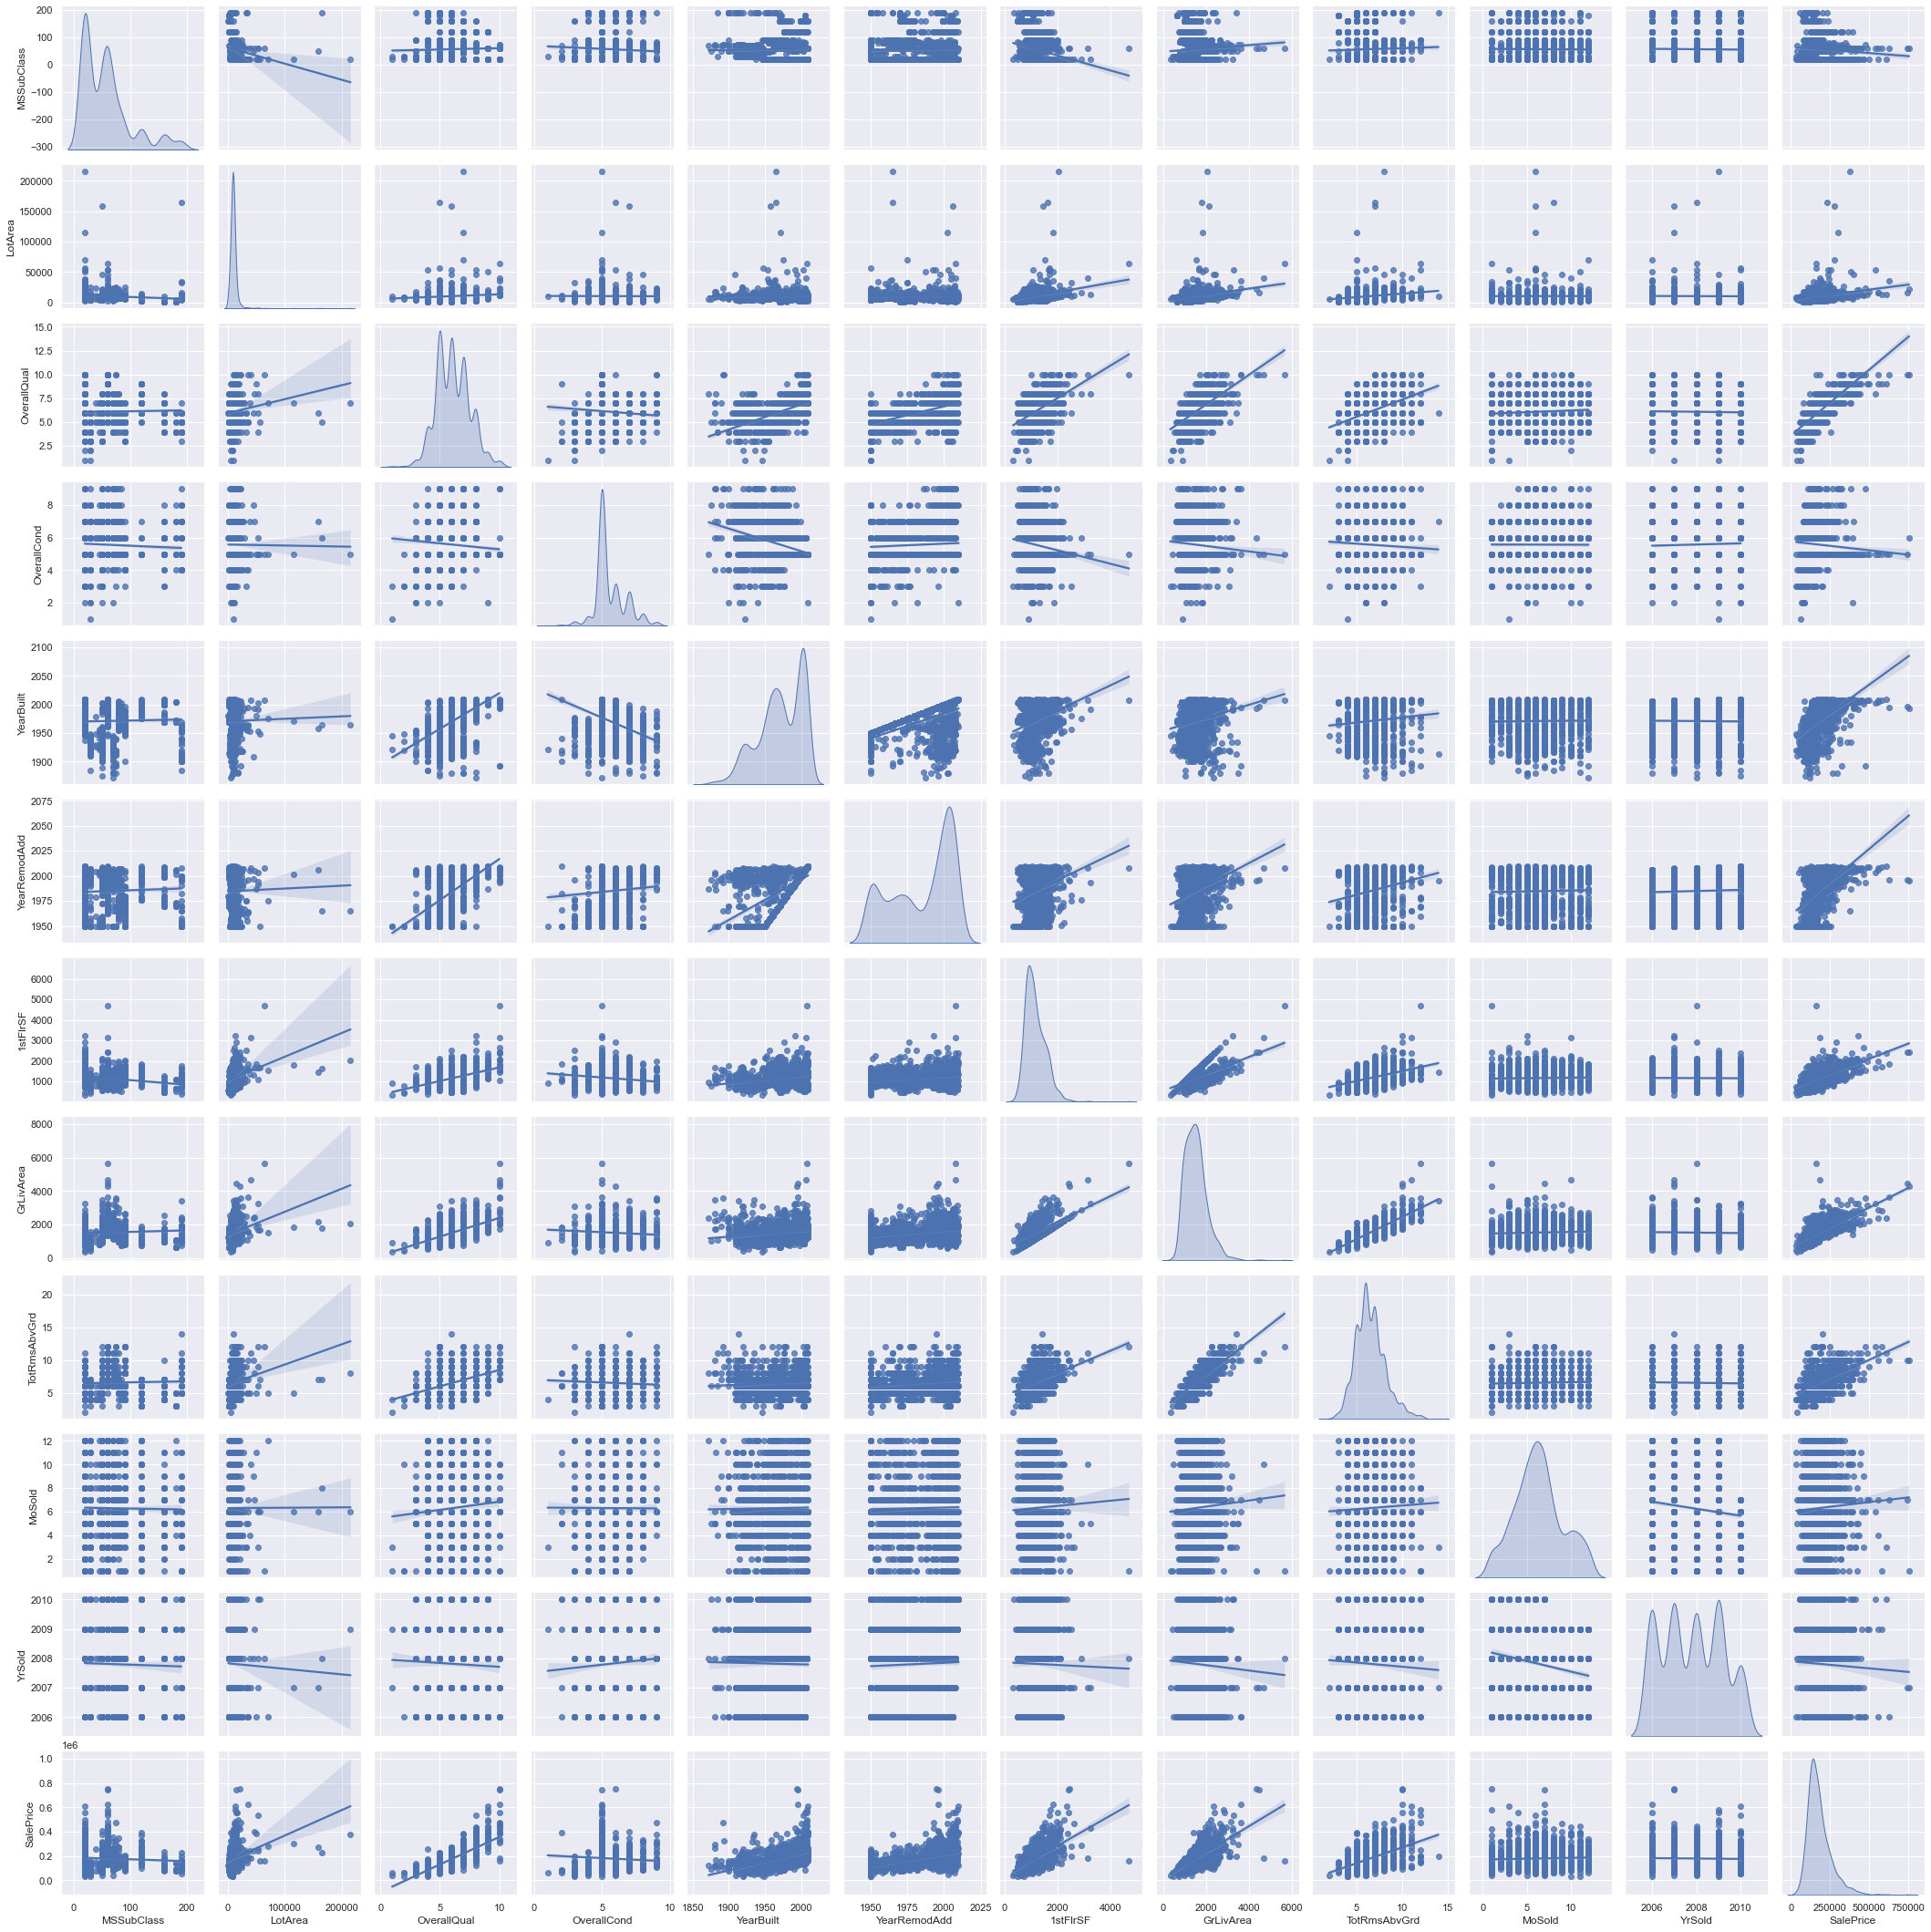

In [186]:

sns.set()
sns.pairplot(df_train_num,diag_kind='kde',kind ='reg')
plt.show()

# model-1 ---->Simple Linear Regression

In [187]:
X = df_train_num[['OverallQual']]
Y = df_train_num['SalePrice']
train_x, valid_x, train_y, valid_y = train_test_split(X,Y,train_size=0.8,random_state=0)
slr_model =  LinearRegression()
slr_model.fit(train_x,train_y)
y_pre = slr_model.predict(valid_x)
len(y_pre)

## calculate MAE 
MAE = sm.mean_absolute_error(y_pre,valid_y)

## calculate variance score
variance_score = sm.explained_variance_score(y_pre,valid_y)

## calculate RMSE 
RMSE  = sm.mean_squared_error(y_pre,valid_y)

## calculate R_square(R2) score 
r2 = sm.r2_score(y_pre,valid_y)



In [189]:
## accuracy parameters are folowing
## for a good machine learning model
#-----> r2_should nearly to 1
#-----> Root mean squared error(RMSE) is low
#-----> variance score is high


print('MAE : {}    variance_score : {}   RMSE : {}    r2 : {}'.format(MAE,variance_score,RMSE,r2))

MAE : 32160.942388859272    variance_score : 0.4007973728654476   RMSE : 2572969092.660074    r2 : 0.39950532314827025


# Model_2 ----> Multipule Linear Regression

In [199]:
## in simple linear regression the r3 is less  and more error is occured
## try with multipile linear regression for better accuracy

#first lets get column with linear correlation wih price 
X_mlr = df_train_num[['LotArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','TotRmsAbvGrd']]

X_train, X_valid, y_train, y_valid = train_test_split(X_mlr, Y, train_size=0.8, test_size=0.2,random_state=0)
                                                      

multiple_linear = LinearRegression()
multiple_linear.fit(X_train, y_train)
mlr_y_pre = multiple_linear.predict(X_valid)

## calculate MAE 
mlr_MAE = sm.mean_absolute_error(mlr_y_pre,valid_y)

## calculate variance score
mlr_variance_score = sm.explained_variance_score(mlr_y_pre,valid_y)

## calculate RMSE 
mlr_RMSE  = sm.mean_squared_error(mlr_y_pre,valid_y)

## calculate R_square(R2) score 
mlr_r2 = sm.r2_score(mlr_y_pre,valid_y)



print('MAE : {}    variance_score : {}   RMSE : {}    r2 : {}'.format(mlr_MAE,mlr_variance_score,mlr_RMSE,mlr_r2))

MAE : 26539.198861902052    variance_score : 0.6150175720255051   RMSE : 2320982068.0144815    r2 : 0.6148076458617846


# Model_3 ----> Decision Tree Regressor

In [203]:
## accuracy is improved for multiple linear regression compared to simple linear regression
## for more better accuuracy try with Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
DTR_y_pre = model.predict(X_valid)

## calculate MAE 
DTR_MAE = sm.mean_absolute_error(DTR_y_pre,valid_y)

## calculate variance score
DTR_variance_score = sm.explained_variance_score(DTR_y_pre,valid_y)

## calculate RMSE 
DTR_RMSE  = sm.mean_squared_error(DTR_y_pre,y_valid)

## calculate R_square(R2) score 
DTR_r2 = sm.r2_score(DTR_y_pre,valid_y)


print('MAE : {}    variance_score : {}   RMSE : {}    r2 : {}'.format(DTR_MAE,DTR_variance_score,DTR_RMSE,DTR_r2))

MAE : 27606.65068493151    variance_score : 0.788152137132622   RMSE : 1574779517.3561645    r2 : 0.7878188084322841


# Model_4----> Random Forest Regressor

In [207]:
rf_model =  RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
rf_y_pre = rf_model.predict(X_valid)

## calculate MAE 
rf_MAE = sm.mean_absolute_error(rf_y_pre,valid_y)

## calculate variance score
rf_variance_score = sm.explained_variance_score(rf_y_pre,valid_y)

## calculate RMSE 
rf_RMSE  = sm.mean_squared_error(rf_y_pre,y_valid)

## calculate R_square(R2) score 
rf_r2 = sm.r2_score(rf_y_pre,valid_y)


print('MAE : {}    variance_score : {}   RMSE : {}    r2 : {}'.format(rf_MAE,rf_variance_score,rf_RMSE,rf_r2))

MAE : 19504.2563018591    variance_score : 0.8278170430637006   RMSE : 1049894008.9144927    r2 : 0.8277019988799397


# Model_5----> Gradient Boosting with XGBoost

In [212]:
xgb_model = XGBRegressor(n_estimators=350, learning_rate=0.05)

# Fit the model
xgb_model.fit(X_train,y_train)              
xgb_y_pre= xgb_model.predict(X_valid)

# Calculate MAE
xgb_MAE = mean_absolute_error(xgb_y_pre, y_valid)

## calculate variance score
xgb_variance_score = sm.explained_variance_score(xgb_y_pre,valid_y)

## calculate RMSE 
xgb_RMSE  = sm.mean_squared_error(xgb_y_pre,y_valid)

## calculate R_square(R2) score 
xgb_r2 = sm.r2_score(xgb_y_pre,valid_y)


print('MAE : {}    variance_score : {}   RMSE : {}    r2 : {}'.format(xgb_MAE,xgb_variance_score,xgb_RMSE,xgb_r2))


MAE : 19153.145695098458    variance_score : 0.8639538666261237   RMSE : 970849533.4717537    r2 : 0.8634625006706607


C:\Users\Bharath kuamr reddy\ykr\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


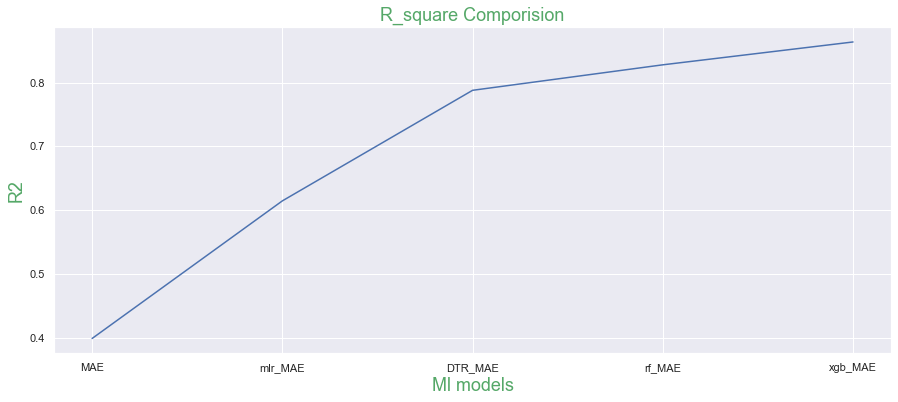

In [277]:
## now comparing the accuracy levals of all applied model
plt.figure(figsize=(15,6))
y = [r2,mlr_r2,DTR_r2,rf_r2,xgb_r2]
x = ['MAE','mlr_MAE','DTR_MAE','rf_MAE','xgb_MAE']
sns.lineplot(x,y)
plt.title('R_square Comporision',fontsize=18,c = 'g')
plt.xlabel('Ml models',fontsize=18,c = 'g')
plt.ylabel('R2',fontsize=18,c ='g')
plt.show()

C:\Users\Bharath kuamr reddy\ykr\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


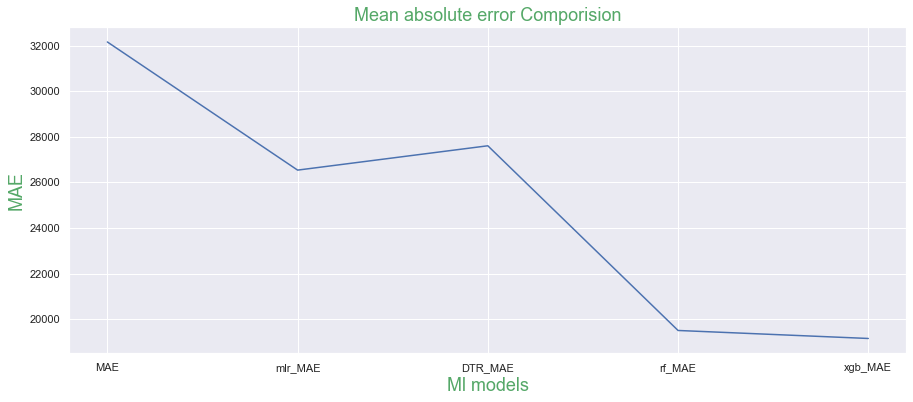

In [274]:
## now comparing the accuracy levals of all applied model

plt.figure(figsize=(15,6))
y = [MAE,mlr_MAE,DTR_MAE,rf_MAE,xgb_MAE]
x = ['MAE','mlr_MAE','DTR_MAE','rf_MAE','xgb_MAE']
sns.lineplot(x,y)
plt.title('Mean absolute error Comporision',fontsize=18,c = 'g')
plt.xlabel('Ml models',fontsize=18,c = 'g')
plt.ylabel('MAE',fontsize=18,c='g')
plt.show()

In [241]:
### from the above plot we can observe that error was less in XGBoost model out of all above used 
##.....so we used XGBoost to presdict the test data
df_test.columns
X_test_data = df_test[['LotArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','TotRmsAbvGrd']]
X_test_data.head()
#X_test_data.shape

,LotArea,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,TotRmsAbvGrd
Id,,,,,,,
1461,11622,5,1961,1961,896,896,5
1462,14267,6,1958,1958,1329,1329,6
1463,13830,5,1997,1998,928,1629,6
1464,9978,6,1998,1998,926,1604,7
1465,5005,8,1992,1992,1280,1280,5


In [259]:
y_test_pre = xgb_model.predict(X_test_data)
len(y_test_pre)


1459

In [257]:
house_price_pred = pd.DataFrame({'Id' : X_test_data.index,'Sales price predicted':y_test_pre})
house_price_pred.to_csv('house_price_proj_pred.csv')
